In [1]:
import pandas as pd

# Data Cleaning

## Load Dataset

In [3]:
df = pd.read_csv("../Data/raw_netflix_data.csv")

In [4]:
print("🔍 Dataset shape before cleaning:", df.shape)

🔍 Dataset shape before cleaning: (8807, 12)


## 1. Check Missing Values

In [5]:
print("\nMissing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#### Fill missing categorical columns with 'Unknown' or 'Not Rated'

In [6]:
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")
df['date_added'] = df['date_added'].fillna("Unknown")

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

#### Duration - fill missing with '0' (or 'Unknown')

In [8]:
df['duration'] = df['duration'].fillna("0")

## 2. Remove Duplicates

In [9]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"\nFound {duplicates} duplicate rows. Removing them...")
    df = df.drop_duplicates()

## 3. Strip Extra Spaces (cleanup)

In [10]:
for col in ['title', 'director', 'cast', 'country', 'rating']:
    df[col] = df[col].astype(str).str.strip()

## 4. Fix Data Types if needed

In [11]:
# Example: If you want to extract duration in minutes for movies
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

## 5. Final check

In [12]:
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("🔍 Dataset shape after cleaning:", df.shape)


Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
duration_num    0
dtype: int64
🔍 Dataset shape after cleaning: (8807, 13)


In [13]:
df.to_csv('cleaned_netflix_data.csv', index=False)

# Data Visualization

## 1. Import Libraries & Load Cleaned Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Load cleaned dataset
df = pd.read_csv('../Data/cleaned_netflix_data.csv')

# Check data
print(df.shape)
df.head()


(8807, 13)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


## 2. Content Type Distribution (Movies vs TV Shows)

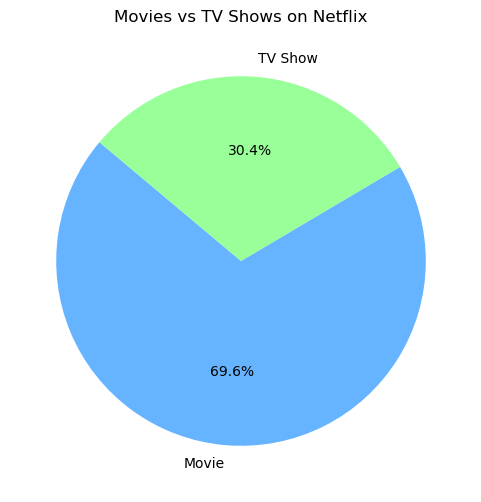

In [25]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=140)
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('')
plt.show()


## 3. Top 10 Countries by Content

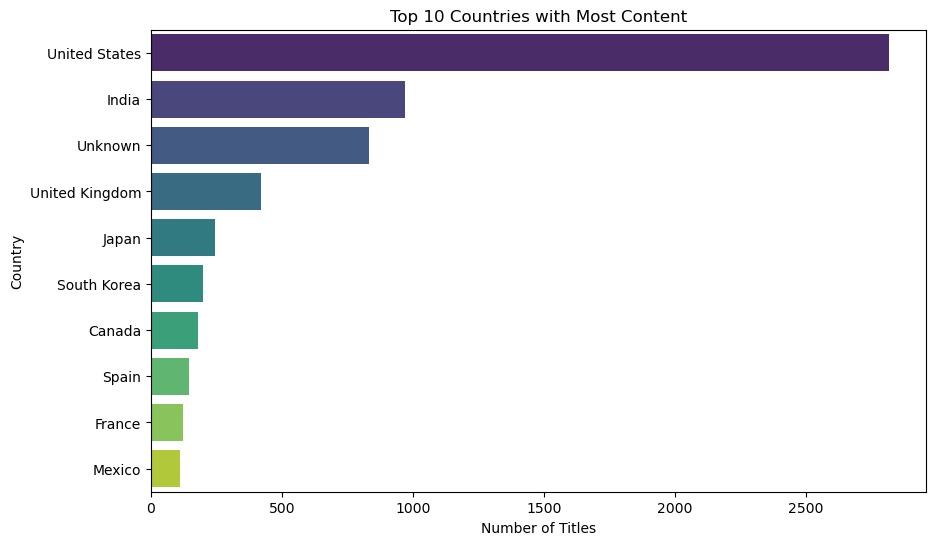

In [26]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## 4. Yearly Content Trend

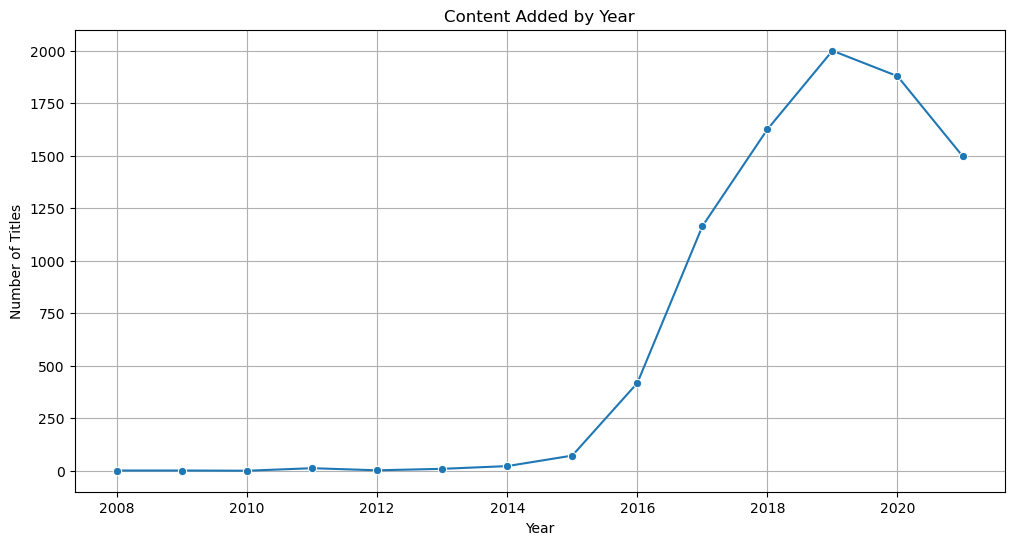

In [27]:
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
yearly = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


## 5. Most Common Genres

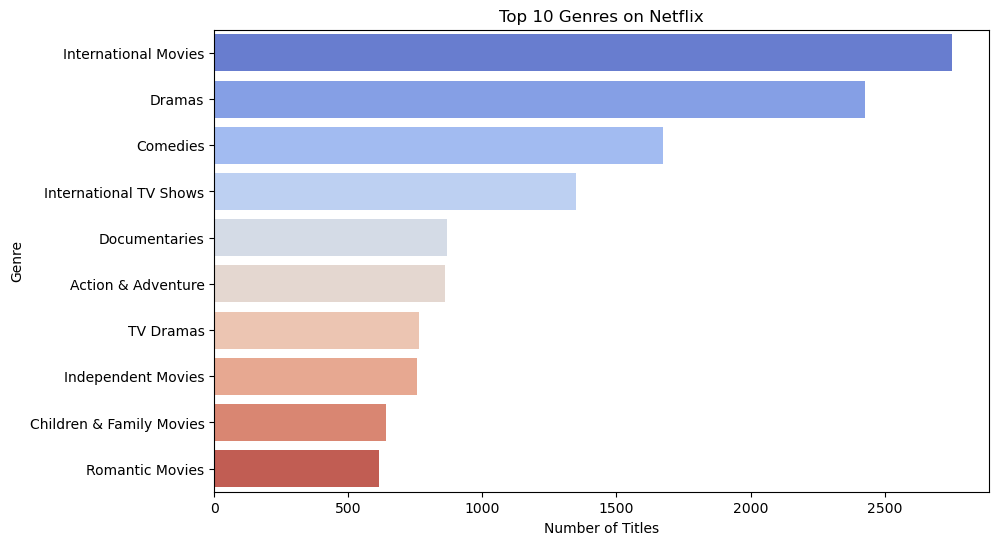

In [28]:
from collections import Counter

# Split genres and count
genres = df['listed_in'].dropna().str.split(', ')
genre_list = [genre for sublist in genres for genre in sublist]
genre_counts = Counter(genre_list).most_common(10)

genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## 6. Word Cloud of Descriptions

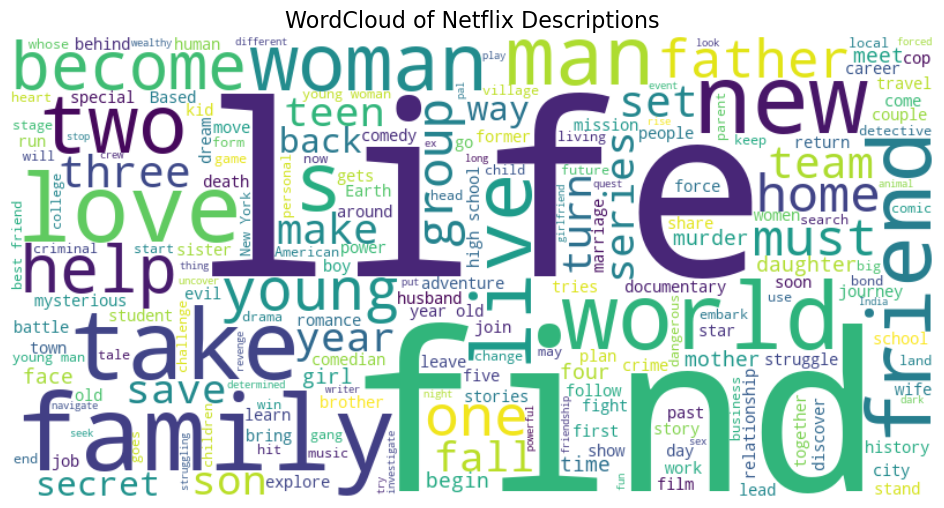

In [29]:
text = " ".join(desc for desc in df['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Descriptions', fontsize=16)
plt.show()


## 7. Duration Analysis (Movies Only)

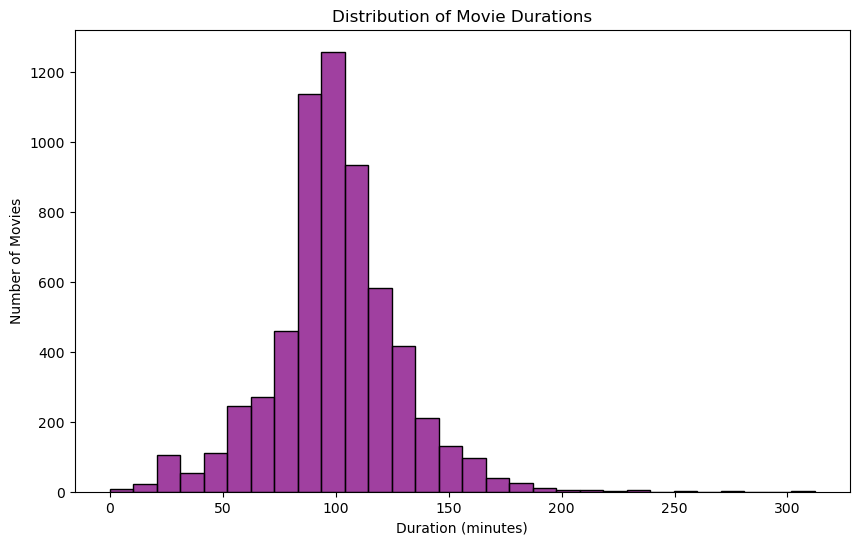

In [30]:
movies = df[df['type'] == 'Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.extract('(\d+)')[0], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(movies['duration_num'].dropna(), bins=30, color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


## 8. Insights Print Section

In [31]:
print("Key Insights:")
print(f"- Total Titles: {len(df)}")
print(f"- Movies: {len(df[df['type']=='Movie'])}, TV Shows: {len(df[df['type']=='TV Show'])}")
print(f"- Most Common Genre: {genre_df.iloc[0,0]}")
print(f"- Country with Most Content: {top_countries.index[0]}")


Key Insights:
- Total Titles: 8807
- Movies: 6131, TV Shows: 2676
- Most Common Genre: International Movies
- Country with Most Content: United States


## 9. Export Final Report

In [32]:
# Save insights summary
with open("final_insights.txt", "w") as f:
    f.write("Netflix Dataset Analysis Summary\n")
    f.write(f"Total Titles: {len(df)}\n")
    f.write(f"Movies: {len(df[df['type']=='Movie'])}\n")
    f.write(f"TV Shows: {len(df[df['type']=='TV Show'])}\n")
    f.write(f"Top Genre: {genre_df.iloc[0,0]}\n")
    f.write(f"Top Country: {top_countries.index[0]}\n")
